# <font color='yellow' style='font-size: 30px;'>Simulação aula 04/04 : Sintonia de sistema de primeira ordem </font> <hr style='border: 2px solid yellow;'>

#### imports <hr style='line: 1px solid;'>

In [2]:
import control
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

#### O sistema: <hr style='line: 1px solid blue;'>

Considere o sistema $$ G(s) = \frac{Y(s)}{R(s)} = \frac{0.9}{62s + 1} $$

Suas raízes serão:

In [23]:
# Sistema 1
num1 = [0.9]
den1 = [62, 1]
sys1 = control.TransferFunction(num1, den1)

G = control.tf(num1, den1)
H = control.tf([1], [1])
L = G * H
r = control.pole(L)

print("Raízes: ", r)

Raízes:  [-0.01612903+0.j]


#### Vetor tempo <hr style='line: 1px solid blue;'>

In [24]:
# Tempo de simulação
t = np.linspace(0, 10, 1000)
ref = np.ones_like(t)

#### Simulação da resposta ao Impulso <hr style='line: 1px solid;'>

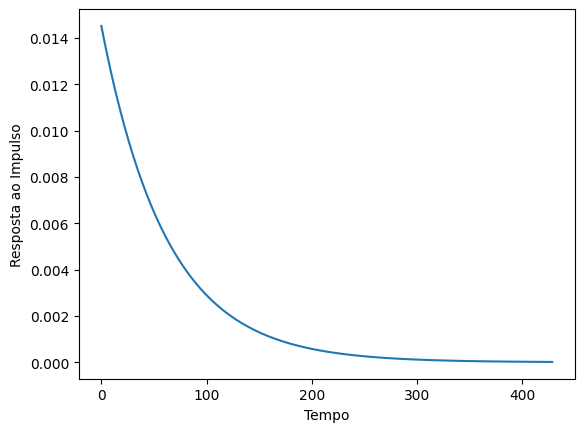

In [26]:
# Simular a resposta ao impulso
t1_impulse, y1_impulse = control.impulse_response(sys1)

# Plotar a resposta ao impulso
plt.plot(t1_impulse, y1_impulse)
plt.xlabel('Tempo')
plt.ylabel('Resposta ao Impulso')
plt.show()


#### Parâmetros da resposta ao degrau <hr style='line: 1px solid;'>

In [17]:
# Calcular informações da resposta ao degrau
info_from_step = control.step_info(sys1)

# Converter dicionário em dataframe
df = pd.DataFrame.from_dict(info_from_step, orient='index')
print(df)
# print(f"Error :{ref - y1}")

                           0
RiseTime          134.108138
SettlingTime      246.585931
SettlingMin         0.540000
SettlingMax         0.600000
Overshoot           0.000000
Undershoot          0.000000
Peak                0.599400
PeakTime          428.280827
SteadyStateValue    0.600000


#### Simulação da resposta ao Degrau <hr style='line: 1px solid;'>

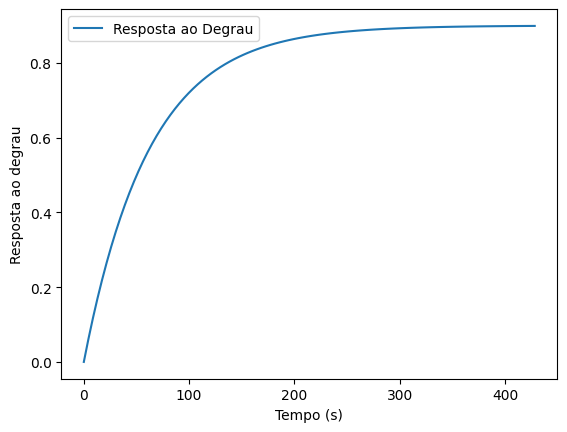

In [27]:
# Resposta ao degrau
t1_step, y1_step = control.step_response(sys1)

# Plot das respostas
plt.plot(t1_step, y1_step, label='Resposta ao Degrau')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta ao degrau')
plt.legend()
plt.show()


# lixo

In [29]:
import control

# Criar um sistema de controle
num = [1]
den = [1, 2, 1]
sys = control.tf(num, den)

# Calcular os margens de estabilidade do sistema
gm, pm, sm, wg, wp, ws = control.stability_margins(sys)

# Verificar se o sistema é estável
if gm > 0 and pm > 0:
    print("O sistema é estável.")
else:
    print("O sistema é instável.")


O sistema é estável.
